In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [11]:
load_data = pd.read_csv('demandForecastingData.csv', parse_dates=['Date'])

In [12]:
def calculate_date(date, displacement_value, displacement_unit):
    minute_map = {
        'Half Hours': 30,
        'Hours': 60,
        'Days': 1440,
        'Weeks': 10080,
        'Months': 40320,
        'Years': 524160
    }
    date = datetime.strptime(date, "%Y-%m-%d")
    displacement_minutes = minute_map.get(displacement_unit)
    return date - timedelta(minutes=displacement_minutes*displacement_value)


In [13]:
def displace_dataframe(load_data, start_date, end_date, displacement_value, displacement_unit):
    start_date = calculate_date(
        start_date, displacement_value, displacement_unit)
    end_date = calculate_date(end_date, displacement_value, displacement_unit)
    predicted_load = load_data[(load_data.Date >= start_date) & (load_data.Date <= end_date)]['Load'].reset_index(drop=True)
    return predicted_load

In [15]:
predicted_load = displace_dataframe(load_data, '2013-01-01', '2013-01-08', 1, 'Weeks')

In [35]:
ranged_load_data = load_data[(load_data.Date >= datetime(2013, 1, 1)) & (load_data.Date <= datetime(2013, 1, 8))]

In [36]:
ranged_load_data = ranged_load_data.reset_index(drop=True)

In [37]:
ranged_load_data['Predicted Load'] = predicted_load

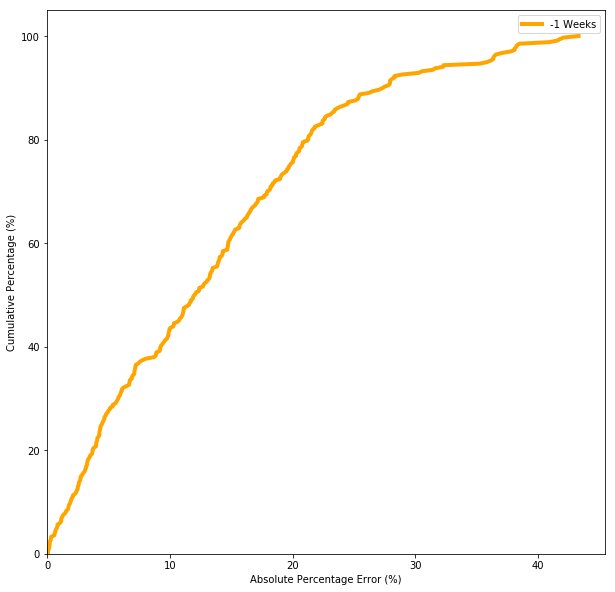

In [43]:
def absolute_percentage_error(row): #calculates APE of predicted load with actual load (y-axis)
    y_true = row['Load']
    y_pred = row['Predicted Load'] 
    return np.abs((y_true - y_pred) / y_true) * 100

ranged_load_data['APE'] = ranged_load_data.apply(lambda row: absolute_percentage_error(row), axis=1) #calculating the APE
ranged_load_data = ranged_load_data.sort_values(by=['APE']) #sort entries by APE

ranged_load_data['Index'] = range(1, len(ranged_load_data)+1) #adds index to data

def calc_percent(row): #sets cumulative % (x-axis)
    percent_of_data = (row['Index']/len(ranged_load_data)) * 100 
    return percent_of_data

ranged_load_data['error percent'] = ranged_load_data.apply(lambda row: calc_percent(row), axis=1) #calculating the cumulative %

plt.figure(figsize=(10,10)) #setting the visualisation limits of the graph
plt.plot(ranged_load_data['APE'], ranged_load_data['error percent'], color='orange', linewidth=4.0) #plotting the graph
plt.legend(['-1 Weeks']) #legend of graph visualisation
plt.xlabel('Absolute Percentage Error (%)')
plt.ylabel('Cumulative Percentage (%)')
plt.xlim(0) #start x at 0
plt.ylim(0) #start y at 0
plt.savefig("APE Visualisation.svg", format="svg", bbox_inches='tight') #saving the visualisation

In [18]:
# def linear_interpolate(x, y, APE_value):
#     closest_negative_distance = 0
#     x1 = 0
#     y1 = 0
#     closest_positive_difference = 0
#     x2 = 0
#     y2 = 0
#     for x, y in zip(x, y):
#         negative_difference = y - APE_value
#         positive_difference = APE_value - y
#         if closest_negative_distance > negative_difference:
#             negative_difference = closest_negative_distance
#             x1 = x
#             y1 = y
#         if closest_positive_distance > positive_difference:
#             positive_difference = closest_positive_difference
#             x2 = x
#             y2 = y
        
#     x1 = numpy.searchsorted(x, APE_value)
#     x2 = numpy.searchsorted(x, APE_value, side='right')
#     y1 = 

In [20]:
np.interp([90], ranged_load_data['error percent'], ranged_load_data['MAPE'])

array([10.9833223])

In [22]:
np.interp([90],[25, 50, 75, 100], [5, 7, 9, 12])

array([10.8])